In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
from HARK.distribution import Bernoulli

import matplotlib.pyplot as plt
import numpy as np

## Original Perfect Foresight Example

In [2]:
PFexample = PerfForesightConsumerType()
PFexample.cycles = 0

SimulationParams = {
    "AgentCount": 10000,  # Number of agents of this type
    "T_sim": 120,  # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 0, #1.0,  # Standard deviation of log initial assets
    "pLvlInitMean": 0.0,  # Mean of log initial permanent income
    "pLvlInitStd": 0.0,  # Standard deviation of log initial permanent income
    "PermGroFacAgg": 1.0,  # Aggregate permanent income growth factor
    "T_age": None,  # Age after which simulated agents are automatically killed,
    "LivPrb": [0.98]
}

PFexample.assign_parameters(**SimulationParams)

In [3]:
PFexample.solve()

In [4]:
PFexample

<HARK.ConsumptionSaving.ConsIndShockModel.PerfForesightConsumerType object at 0x7f81cd8bae60.
Parameters:
cycles: 1
CRRA: 2.0
Rfree: 1.03
DiscFac: 0.96
LivPrb: [0.98]
PermGroFac: [1.01]
BoroCnstArt: None
MaxKinks: 400
AgentCount: 10000
aNrmInitMean: -6.0
aNrmInitStd: 0
pLvlInitMean: 0.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
T_sim: 120>

In [5]:
PFexample.track_vars = ["who_dies","mNrm","pLvl"]
PFexample.make_shock_history()

PFexample.initialize_sim()
PFexample.simulate()

{'who_dies': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'mNrm': array([[  1.00252784,   1.00252784,   1.00252784, ...,   1.00252784,
           1.00252784,   1.00252784],
        [ -0.30338194,  -0.30338194,  -0.30338194, ...,  -0.30338194,
          -0.30338194,  -0.30338194],
        [ -1.57617872,  -1.57617872,  -1.57617872, ...,  -1.57617872,
          -1.57617872,  -1.57617872],
        ...,
        [-21.97112221,  -9.62650475, -36.60139796, ...,   1.00252784,
          -2.81670212, -46.01051785],
        [-22.6945059 , -10.6629019 ,   1.00252784, ...,  -0.30338194,
          -4.02577047, -46.12435211],
        [-23.39954727, -11.67301988,  -0.30338194, ...,  -1.57617872,
          -5.20418135, -46.23529996]]),
 'pLvl': array([[1.01      , 1.01      , 1.01      , ..., 1.01      

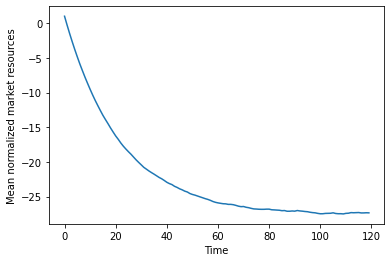

In [6]:
plt.plot(np.mean(PFexample.history["mNrm"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

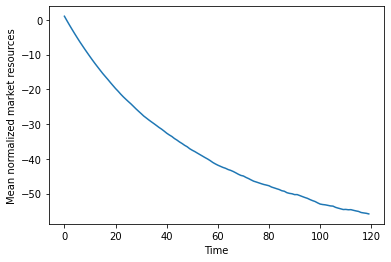

In [7]:
plt.plot(np.mean(PFexample.history["mNrm"] * PFexample.history["pLvl"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_82097/947589964.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(PFexample.history["mNrm"], axis=1) - np.min(np.mean(PFexample.history["mNrm"], axis=1))))


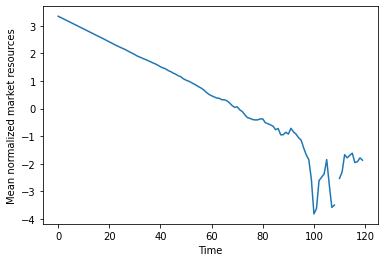

In [8]:
plt.plot(np.log(np.mean(PFexample.history["mNrm"], axis=1) - np.min(np.mean(PFexample.history["mNrm"], axis=1))))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

In [9]:
PFexample.history["who_dies"][0,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
PFexample.newborn_init_history['pLvl'][1,PFexample.history["who_dies"][1,:] > 0].shape

(203,)

In [11]:
PFexample.newborn_init_history['aNrm'][2, PFexample.history["who_dies"][2,:] > 0].shape

(181,)

## Using the Generic Monte Carlo Simulator

In [12]:
from HARK.distribution import Lognormal
import HARK.models.perfect_foresight_normalized as pfn
from HARK.simulation.monte_carlo import AgentTypeMonteCarloSimulator

In [13]:
pfn.model

{'shocks': {'live': <HARK.distribution.Bernoulli at 0x7f81cd6c33d0>},
 'parameters': {'DiscFac': 0.96,
  'CRRA': (2.0,),
  'Rfree': 1.03,
  'LivPrb': 0.98,
  'PermGroFac': 1.01,
  'BoroCnstArt': None},
 'dynamics': {'p': <function HARK.models.perfect_foresight_normalized.<lambda>(PermGroFac, p)>,
  'r_eff': <function HARK.models.perfect_foresight_normalized.<lambda>(Rfree, PermGroFac)>,
  'b_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(r_eff, a_nrm)>,
  'm_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(b_nrm)>,
  'c_nrm': <HARK.model.Control at 0x7f81cd53bfa0>,
  'a_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(m_nrm, c_nrm)>},
 'reward': {'u': <function HARK.models.perfect_foresight_normalized.<lambda>(c)>}}

In [14]:
pfn_simulator = AgentTypeMonteCarloSimulator(
    pfn.model['parameters'],
    pfn.model['shocks'],
    pfn.model['dynamics'],
    {
        'c_nrm' : lambda m_nrm: PFexample.solution[0].cFunc(m_nrm)
    },
    { # initial states
        'a_nrm' : Lognormal(-6, 0),
        #'live' : 1,
        'p' : 1.0
    },
    agent_count = 10000,
    T_sim = 120
)

In [15]:
pfn_simulator.read_shocks = True
pfn_simulator.shock_history['live'] = 1 - PFexample.history["who_dies"]

In [16]:
pfn_simulator.newborn_init_history['a_nrm'] = PFexample.newborn_init_history['aNrm']
pfn_simulator.newborn_init_history['p'] = PFexample.newborn_init_history['pLvl']
#pfn_simulator.newborn_init_history['live'] = np.ones(PFexample.newborn_init_history['pLvl'].shape)

In [20]:
#pf_simulator.track_vars = ["mNrm"]
pfn_simulator.initialize_sim()
pfn_simulator.simulate(sim_periods=120)

{'live': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'p': array([[1.01      , 1.01      , 1.01      , ..., 1.01      , 1.01      ,
         1.01      ],
        [1.0201    , 1.0201    , 1.0201    , ..., 1.0201    , 1.0201    ,
         1.0201    ],
        [1.030301  , 1.030301  , 1.030301  , ..., 1.030301  , 1.030301  ,
         1.030301  ],
        ...,
        [1.25716302, 1.09368527, 1.66107814, ..., 2.54805698, 1.030301  ,
         2.57353755],
        [1.26973465, 1.10462213, 1.67768892, ..., 1.01      , 1.04060401,
         2.59927293],
        [1.282432  , 1.11566835, 1.01      , ..., 1.0201    , 1.05101005,
         2.62526565]]),
 'r_eff': array([[1.01980198, 1.01980198, 1.01980198, ..., 1.01980198, 1.01980198,
         1.01980198],
        [1.01980198, 1.01980198, 1.0198019

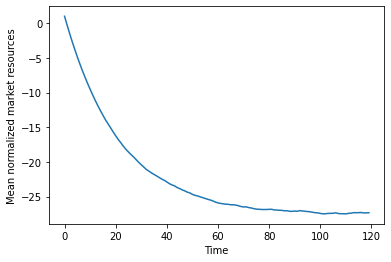

In [21]:
plt.plot(np.mean(pfn_simulator.history['m_nrm'], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_82097/2889722531.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(pfn_simulator.history["m_nrm"], axis=1) - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))))


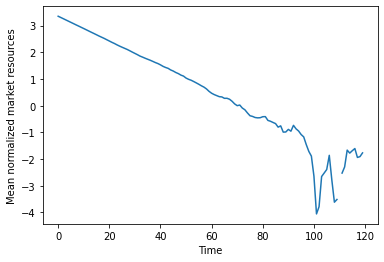

In [22]:
plt.plot(np.log(np.mean(pfn_simulator.history["m_nrm"], axis=1) - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

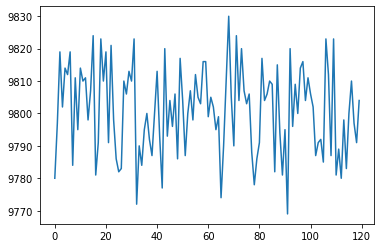

In [23]:
plt.plot(pfn_simulator.history['live'].sum(axis=1))

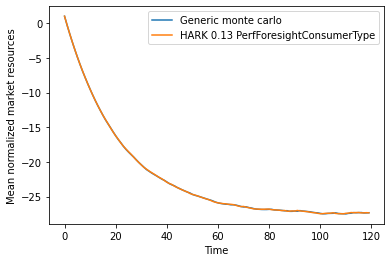

In [24]:
plt.plot(np.mean(pfn_simulator.history['m_nrm'], axis=1), label = 'Generic monte carlo')
plt.plot(np.mean(PFexample.history["mNrm"], axis=1), label = 'HARK 0.13 PerfForesightConsumerType')
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.legend()
plt.show()

In [25]:
np.mean(pfn_simulator.history['m_nrm'], axis=1) - np.mean(PFexample.history["mNrm"], axis=1)

array([ 0.        ,  0.00222005,  0.00809147,  0.0012631 ,  0.00715372,
        0.00472244,  0.01164685, -0.02193753,  0.00705938, -0.00575065,
        0.01159715,  0.01218249,  0.00756169, -0.01088867,  0.00391398,
        0.01271844, -0.03643547, -0.02459725,  0.03015856,  0.01530481,
        0.02311477, -0.03156213,  0.03450044, -0.0074543 , -0.04107368,
       -0.04513277, -0.04755333,  0.01681224,  0.02868896,  0.00597751,
        0.0062148 ,  0.03227652, -0.05788355, -0.03502477, -0.05127585,
       -0.04840637, -0.02264437, -0.01016401, -0.04317002,  0.01554684,
        0.04422656, -0.01825121, -0.05225021,  0.05681161, -0.02034541,
        0.02992888, -0.01631412,  0.03085562, -0.03086612,  0.07806968,
       -0.00208791, -0.03290248,  0.00225374,  0.00643284,  0.00942418,
        0.01848714,  0.00079372,  0.03766846,  0.07001856,  0.02767114,
       -0.00659404, -0.02168669, -0.0207974 , -0.05963123,  0.00159466,
       -0.06902993, -0.01631861,  0.03258728,  0.05195744,  0.01